### Dimensionality Reduction 
#### DCA Testing
Testing Deep Count Autoencoder (DCA) on *GSE102698ClosenessRep_0.hdf5* example data  
https://github.com/theislab/dca  
  
Ran from command line as follows:  
`dca little_test_labels.csv results`

In [1]:
import fcc_utils # load utility functions from local file

import numpy as np
import pandas as pd

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'whitegrid')
%matplotlib inline

Get original data

In [2]:
%%time
#load the hdf5 files into objects
r00 = fcc_utils.read_hdf5("inputs/GSE102698ClosenessRep_0.hdf5")

CPU times: user 2.75 s, sys: 499 ms, total: 3.25 s
Wall time: 3.34 s


Get output from DCA

In [ ]:
reduced = np.genfromtxt('DCA_results/reduced.tsv')

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(reduced[:,1],reduced[:,3],s=75)
plt.title('DCA')
plt.xlabel('DCA1')
plt.ylabel('DCA2')

sns.despine(left=True, bottom=True)
plt.tight_layout()

In [ ]:
tSNE_utils.compare_euclid(r00['Close_0.00'], reduced[:,1:])

---
Let's try interfacing the DCA API to run interactively in Python

In [3]:
# make sure that rpy2 is installed: https://rpy2.bitbucket.io/
%load_ext rpy2.ipython

import warnings
from rpy2.rinterface import RRuntimeWarning

# ignore R warning messages
warnings.filterwarnings("ignore", category=RRuntimeWarning)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy.api as scanpy
from dca.api import dca

Using TensorFlow backend.


In [5]:
r00['Close_0.00']

array([[ 0.,  0.,  0., ...,  1.,  6.,  0.],
       [ 0.,  0.,  0., ...,  1.,  9.,  0.],
       [ 0.,  1.,  0., ...,  1.,  3.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  7., 25.,  0.],
       [ 0.,  0.,  0., ...,  4., 30.,  0.]])

In [19]:
adata = scanpy.AnnData(r00['Close_0.00'])
scanpy.pp.filter_genes(adata, min_counts=1)

In [21]:
dca(adata, threads=1)

DCA: Successfully preprocessed 21245 genes and 375 cells.
Calculating low dimensional representations...
Calculating reconstructions...


In [26]:
scanpy.pp.normalize_per_cell(adata)
scanpy.pp.log1p(adata)
scanpy.pp.pca(adata)

In [27]:
adata.X.shape

(375, 21245)

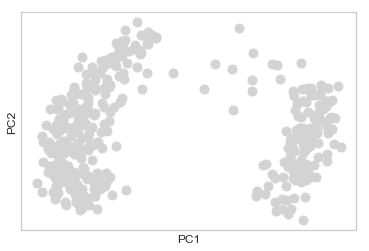

In [28]:
scanpy.pl.pca_scatter(adata)

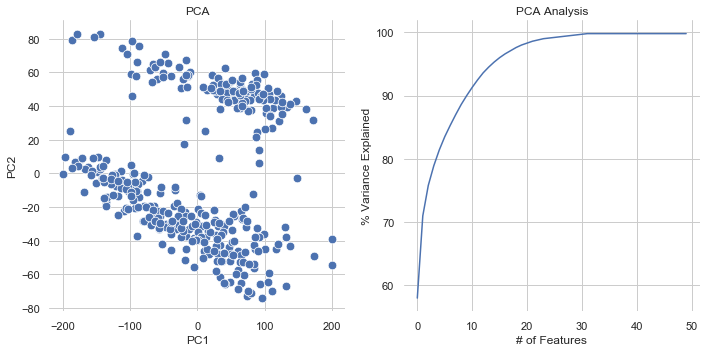

In [25]:
# perform my own PCA to compare
PCA_out = fcc_utils.fcc_PCA(n_comp=50,x=fcc_utils.arcsinh_norm(adata.X))